In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import multi_cauchy
from multi_cauchy import (
    MvsHFile,
    MvsHMeasurement,
    cauchy_cdf,
    multi_cauchy_cdf,
    fit_multi_cauchy_cdf,
    CauchyParams,
    cauchy_pdf,
    multi_cauchy_pdf,
    fit_multi_cauchy_pdf,
    quick_find_peaks,
    plot_cdf_fit,
    plot_pdf_fit,
    fit_multi_cauchy_cdf_and_pdf,
    write_report,
    ingest_report,
)

In [2]:
sample = Path(".") / "sample_files"
file1_path = sample / "201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH.dat"
file2_path = sample / "200710 - [Er(TiPS2COT)I(THF)]2 - 2 - 1 - MvsH - VSM.dat"
file3_path = sample / "201201 - [Er_TIPS2COT_I]3 - 2 - 1 - MvsH.dat" 
file1 = MvsHFile(file1_path) # 1
file2 = MvsHFile(file2_path) # 2
file3 = MvsHFile(file3_path) # 3

file1_report_path = sample / "multi_cauchy_201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH.json"
file2_report_path = sample / "multi_cauchy_200710 - [Er(TiPS2COT)I(THF)]2 - 2 - 1 - MvsH - VSM.json"
file3_report_path = sample / "multi_cauchy_201201 - [Er_TIPS2COT_I]3 - 2 - 1 - MvsH.json"

In [3]:
file3.temperatures

[2.0]

In [4]:
file = file3
meas = MvsHMeasurement(file, 0)

[-1492.04553222656, 1252.74133300781, 5864.71142578125]

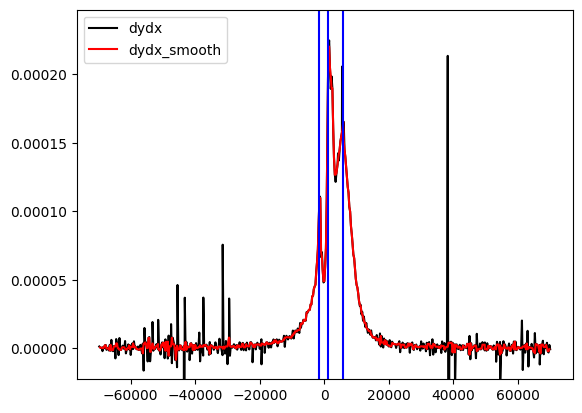

In [5]:
peaks, fig, ax = quick_find_peaks(
    meas,
    # , deriv_method="gradient"),
    find_peaks_args={"height": 0.00002, "distance": 6}
)
# ax.set_xlim(-15000, 15000)
peaks

In [12]:
temp_peaks = peaks.copy()
# temp_peaks.extend([5000])
temp_peaks.extend([-1000, 2500])
# temp_peaks = [-1000, 1500]
# temp_peaks.append(2500)
# temp_peaks.pop()
params = []
for peak in temp_peaks:
    gamma = 500
    params.append(CauchyParams(1/len(peaks), peak, gamma))

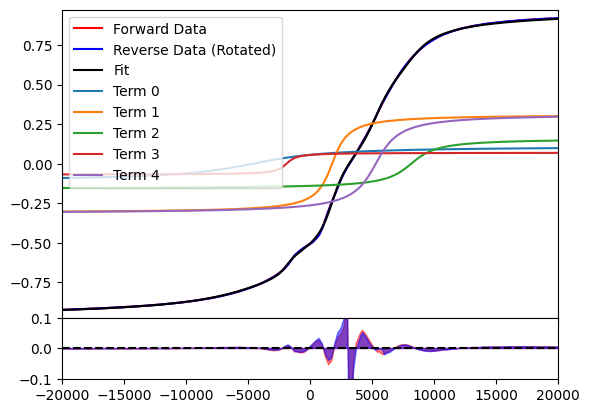

In [13]:
cdf_out = fit_multi_cauchy_cdf(meas, params, sequence = "both")
fig, axs = plot_cdf_fit(meas, cdf_out, sequence = "both")

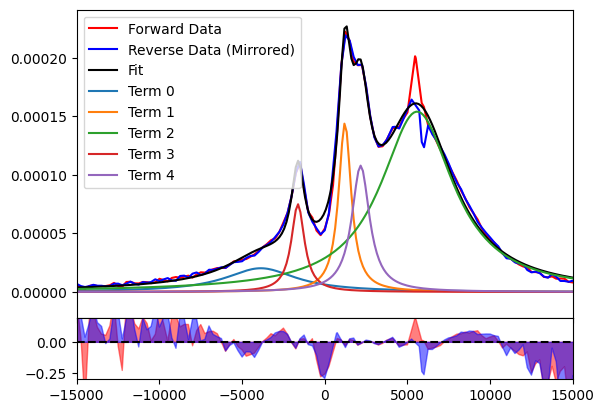

In [14]:
pdf_out = fit_multi_cauchy_pdf(meas, params, sequence="both")
fig, axs = plot_pdf_fit(meas, pdf_out, sequence="both")

In [ ]:
write_report(file, meas, params, cdf_out, pdf_out)

In [ ]:
op1 = ingest_report(file1_report_path) # file1
op1

ReportFile(name='multi_cauchy_201206 - Er_TiPs2COT_I_THF2 - 1 - 2 - MvsH', date_created='2020-12-06T16:12:00', length=2390970, sha512='b0bbfce0e9c5d9e45d81368afe6b6566b794cea9d9f640cbe5bac66f96ecadc22615c2cc45567250281acd976d15c26fac97f7fab918e8f78ca9414690152d75', measurements=[ReportMeasurement(temperature_index=0, temperature=2.0, sweep_rate=50.01294699117912, sweep_rate_std=1.134794745418771, fit_input_params=[CauchyParams(m_s=[0.3333333333333333, 0, 1], h_c=[-3496.908203125, -700000, 700000], gamma=[500, 0, 100000]), CauchyParams(m_s=[0.3333333333333333, 0, 1], h_c=[-247.358367919922, -700000, 700000], gamma=[500, 0, 100000]), CauchyParams(m_s=[0.3333333333333333, 0, 1], h_c=[3256.01538085937, -700000, 700000], gamma=[500, 0, 100000]), CauchyParams(m_s=[0.3333333333333333, 0, 1], h_c=[3500, -700000, 700000], gamma=[500, 0, 100000])], cdf_fit=ReportFit(sum_square_error=0.004681097130345944, reduced_sum_square_error=8.54214804807654e-06, output_params=Parameters([('m_s_0', <Paramete